Projeto 3 - Victor Laperuta de Moura, Gustavo Gobetti

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R



                                                    Introdução:

•	Pergunta: De que forma a situação socioeconômica pode influenciar a expectativa de vida de um país?
•	Os objetivos do projeto são: Analisar como a situação socioeconômica pode influenciar a expectativa de vida.


•	Variável resposta: Expectativa de vida. A expectativa de vida é uma média aritmética das idades que as pessoas morreram nesse determinado local.
•	Variáveis explicativas: Urbanização e IDH.


•	Em “Estatística: o que é, para que serve e como funciona”, Charles Wheelan, economista e professor de políticas públicas e economiano Dartmouth College, destaca a importância na escolha de suas variáveis na análise de regressão:
“a mecânica da análise de regressão não é a parte difícil; a parte difícil é determinar quais variáveis devem ser consideradas na análise e como isso pode ser feito da melhor maneira. A análise de regressão é uma daquelas ferramentas de poder sofisticadas. É relativamente fácil de usar, mas difícil de usar bem – e potencialmente perigosa quando usada de forma inadequada”


•	Neste estudo, buscamos variáveis socioeconômicas que influenciem a expectativa de vida, e, de acordo com o site: http://www.suapesquisa.com/geografia/expectativa_vida.htm , alguns dos fatores que influenciam a expectativa de vida são: qualidade de vida, qualidade dos serviços públicos (educação e saúde), saneamento básico, campanhas de vacinação em massa, segurança no trabalho, criminalidade, ausência de guerras ou conflitos militares, etc.
•	Dentre estes, a qualidade de vida é um importante fator que consiste no conjunto de condições que determinam o bem-estar físico e espiritual da população em questão.
•	De acordo com o mesmo site, também há uma relação entre expectativa de vida e IDH: 

           “Geralmente, os países desenvolvidos apresentam expectativas de vida elevadas (de 80 a 83 anos). Este fato está 
                relacionado com a alta qualidade de vida da população, educação de qualidade e bom atendimento médico-
                hospitalar.Logo, países com índices elevados de IDH (Índice de Desenvolvimento Humano) apresentam também 
                expectativas de vida elevadas.
            Já os países pobres apresentam índices de expectativa de vida baixos. Isto ocorre em função das péssimas   
                condições de trabalho, pobreza da população, condições de vida inadequadas e sistemas de saúde e educação 
                precários. Logo, são países que apresentam também IDH baixo”					

•	Assim, países desenvolvidos teriam expectativas de vida altas, e este fato estaria relacionado ao fato de países desenvolvidos terem um IDH mais alto – termo que, no trecho é utilizado como sinônimo para qualidade de vida. Lembrando que, geralmente, o termo "país desenvolvido" é empregado para descrever países com um padrão de vida alto, uma base industrial forte e com um IDH alto.

   •	Verifica-se, a partir do trecho acima, que o IDH pode ser considerado uma medida da qualidade de vida (o qual é um fator determinante para a expectativa de vida). Neste projeto, por conseguinte, usaremos o IDH como medida da qualidade de vida para estudar seu impacto na variável de resposta.


   •	O IDH é um índice que classifica os países pelo seu grau de desenvolvimento humano e ajuda a classificar os países entre "desenvolvidos", "em desenvolvimento" e "subdesenvolvidos". Ele é composto a partir da expectativa de vida, educação e PIB per capita. 
   
   •	Considerando que o grau de desenvolvimento é uma medida arbitrária, pois não existe uma definição internacionalmente reconhecida, decidimos incluir nessa análise uma medida de urbanização, por conta da sua relação, ao menos superficial (baseada no senso comum de que países mais desenvolvidos são aqueles mais urbanizados), com o grau de desenvolvimento de um país. A medida de urbanização escolhida foi a porcentagem da população que vive em áreas urbanas.


   •	Dessa forma, para responder à pergunta feita, é preciso realizar uma análise de regressão múltipla, sendo a variável dependente a expectativa de vida e as variáveis independentes: o IDH e a urbanização. A análise de regressão é uma ferramenta estatística que permite quantificar a relação entre uma variável específica e um determinado resultado, enquanto controlamos outros fatores. Uma análise de regressão múltipla nos dá uma estimativa da associação linear entre cada variável explicativa e a variável dependente, enquanto mantemos outras variáveis dependentes constantes.
   
   •	Nesse sentido, o objetivo do projeto é avaliar o impacto da qualidade de vida sobre a expectativa de vida, enquanto controlamos a variável independente “urbanização” e “IDH”. Com isso, podemos separar os efeitos independentes de cada um desses fatores e responder à pergunta inicial.
   
   •	Em primeiro lugar, para começar a análise, é preciso certificar-se de que as amostras que serão utilizadas são representativas da população que nos interessa. Neste caso, considerando que as amostras contêm dados da grande maioria dos países, pode-se afirmar que elas são representativas.


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gustavo Gobetti\Documents\Insper\2ºSemestre\Ciência dos dados\Projeto 3


In [21]:
Dataset = pd.read_excel('DatasetCompleto.xlsx', sep =' ')
DatasetGrupos = pd.read_excel('DatasetGrupos.xlsx',sep='')

In [4]:
Dataset.head()

,Países,ExpectativaVida,ExtremaPobreza,IDH,PibSaude,PopUrbana
0,Abkhazia,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,52.4,NaN,0.363,7.301355,22.4248
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN
3,Albania,76.6,NaN,0.729,6.877242,49.0112
4,Algeria,75.3,3.01,0.680,3.534485,68.8230


In [5]:
Dados = Dataset.dropna()

In [6]:
Dados.head()

,Países,ExpectativaVida,ExtremaPobreza,IDH,PibSaude,PopUrbana
4,Algeria,75.3,3.01,0.680,3.534485,68.8230
11,Armenia,72.3,0.00,0.715,3.882306,64.1368
16,Bahamas,71.8,12.19,0.770,8.136875,83.4664
17,Bahrain,77.0,0.04,0.804,3.634649,88.4986
19,Barbados,75.1,5.84,0.791,6.967206,42.2648


In [7]:
Dados.shape

(42, 6)

In [8]:
#Retirar NaN
Dados=Dados[~np.isnan(Dados.ExpectativaVida)]
Dados=Dados[~np.isnan(Dados.ExtremaPobreza)]
Dados=Dados[~np.isnan(Dados.IDH)]
Dados=Dados[~np.isnan(Dados.PibSaude)]
Dados=Dados[~np.isnan(Dados.PopUrbana)]
Dados.shape

(42, 6)

In [9]:
Dados.head()

,Países,ExpectativaVida,ExtremaPobreza,IDH,PibSaude,PopUrbana
4,Algeria,75.3,3.01,0.680,3.534485,68.8230
11,Armenia,72.3,0.00,0.715,3.882306,64.1368
16,Bahamas,71.8,12.19,0.770,8.136875,83.4664
17,Bahrain,77.0,0.04,0.804,3.634649,88.4986
19,Barbados,75.1,5.84,0.791,6.967206,42.2648


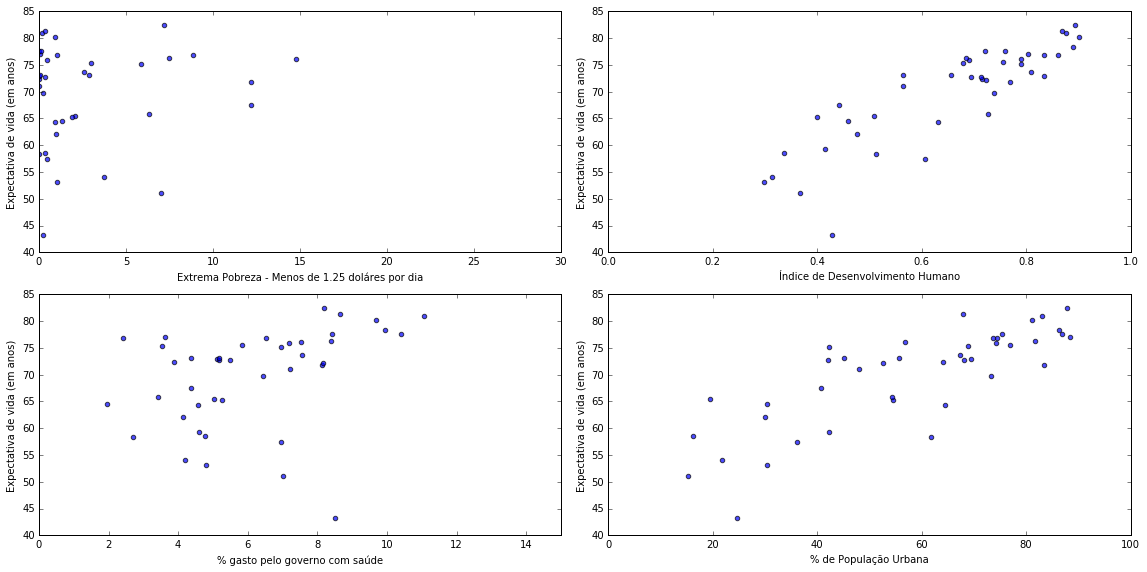

In [10]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(Dados.ExtremaPobreza, Dados.ExpectativaVida, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel('Extrema Pobreza - Menos de 1.25 doláres por dia')
ax[0,0].set_ylabel("Expectativa de vida (em anos)")
ax[0,0].set_xlim(0,30)

ax[0,1].scatter(Dados.IDH, Dados.ExpectativaVida, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Índice de Desenvolvimento Humano")
ax[0,1].set_ylabel("Expectativa de vida (em anos)")
ax[0,1].set_xlim(0,1)

ax[1,0].scatter(Dados.PibSaude, Dados.ExpectativaVida, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("% gasto pelo governo com saúde")
ax[1,0].set_ylabel("Expectativa de vida (em anos)")
ax[1,0].set_xlim(0,15)

ax[1,1].scatter(Dados.PopUrbana, Dados.ExpectativaVida, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("% de População Urbana")
ax[1,1].set_ylabel("Expectativa de vida (em anos)")
ax[1,1].set_xlim(0,100)

plt.tight_layout(1)

In [11]:
Dados.corr(method='pearson')

,ExpectativaVida,ExtremaPobreza,IDH,PibSaude,PopUrbana
ExpectativaVida,1.000000,0.116200,0.858961,0.357696,0.797509
ExtremaPobreza,0.116200,1.000000,0.129861,0.071333,0.007831
IDH,0.858961,0.129861,1.000000,0.449305,0.815177
PibSaude,0.357696,0.071333,0.449305,1.000000,0.379927
PopUrbana,0.797509,0.007831,0.815177,0.379927,1.000000


A partir da análise das correlações obtidas para as variáveis explicativas inicialmente cogitadas, percebe-se que obtivemos correlações altas para IDH e Urbanização - 0.85 e 0.79 respectivamente - , enquanto as variáveis de controle Extrema Pobreza e PibSaude (Porcentagem do PIB que é investida na Saúde possuem correlações baixas - 0.11 e 0.35, respectivamente.

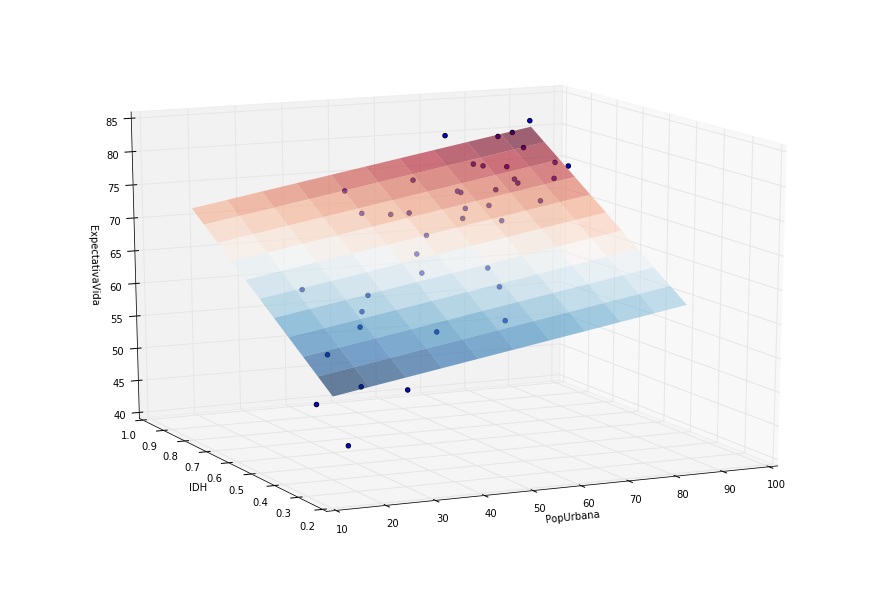

In [12]:
from mpl_toolkits.mplot3d import Axes3D

X = Dados[['PopUrbana', 'IDH']]
y = Dados['ExpectativaVida']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.PopUrbana.min(), X.PopUrbana.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].PopUrbana, X[resid >= 0].IDH, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].PopUrbana, X[resid < 0].IDH, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('PopUrbana')
ax.set_ylabel('IDH')
ax.set_zlabel('ExpectativaVida')

In [13]:
print ('matplotlib.__version__')

matplotlib.__version__


In [16]:

Exp = Dados.iloc[:,(1)]
PopUr = Dados.iloc[:,(5)]
Idh = Dados.iloc[:,(3)]

In [17]:
#Correlação entre Exp - Pop Urbana
np.corrcoef(Exp.tolist(),PopUr.tolist())

array([[ 1.        ,  0.79750915],
       [ 0.79750915,  1.        ]])

In [18]:
#Correlação entre Exp - Idh
np.corrcoef(Exp.tolist(),Idh.tolist())

array([[ 1.        ,  0.85896062],
       [ 0.85896062,  1.        ]])

In [19]:
#Correlação entre PopUrb - Exp
np.corrcoef(PopUr.tolist(),Idh.tolist())



array([[ 1.        ,  0.81517655],
       [ 0.81517655,  1.        ]])

Quando a correlação entre as variáveis explicativas é significativamente alta – maior do que 0.95 - evidencia-se uma contradição: realizar uma análise de regressão múltipla significa separar os efeitos independentes de cada um dos fatores explicativos potenciais; em situações como essa, há grandes chances de tais efeitos serem praticamente os mesmos. Conseguintemente, surgem alguns problemas nos parâmetros obtidos.

No nosso caso, a correlação obtida entre IDH e Urbanização foi de aproximadamente 0.8, que é alta, mas não é tão alta a ponto de causar problemas.


In [22]:

#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=Dados.ExpectativaVida
X=Dados.iloc[:,(3,5)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ExpectativaVida   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     63.85
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           4.99e-13
Time:                        15:23:38   Log-Likelihood:                -121.59
No. Observations:                  42   AIC:                             249.2
Df Residuals:                      39   BIC:                             254.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         41.8279      2.735     15.293      0.000        36.296    47.360
IDH           31.9595      6.865      4.655      0.000        18.074    45.846
PopUrbana      0.1210      0.056      2.169      0.036         0.008     0.234
==============================================================================
Omnibus:                       12.503   Durbin-Watson:                   2.508
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.086
Skew:                          -1.084   Prob(JB):                      0.00144
Kurtosis:                       4.667   Cond. No.                         627.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O Método dos Mínimos Quadrados encaixa a reta que minimiza a soma dos erros residuais elevados ao quadrado. Cada observação nos dados de Expectativa de Vida, IDH e Urbanização resulta num residual, ou seja, numa distância vertical a partir da reta de regressão.

Ademais, uma análise de regressão não prova que a situação socioeconômica define a expectativa de vida, ela apenas rejeita a hipótese nula de que a expectativa de vida não está relacionada com a situação socioeconômica.

Essa tabela com o resultado da regressão nos informa alguns resultados fundamentais para a concluir se a variável de resposta está ou não associada às variáveis explicativas:

   -O "R-Squared" é uma medida do tamanho total de variação explicado pela equação de regressão. Ele nos informa o quanto desta variação em torno da média está associado apenas com as variáveis independentes. Caso o "R-Squared" seja 0.3, significa que 70% da variação da variável resposta permanece inexplicada. No caso, o valor obtido de "R-Squared" foi de 0.766 e, consequentemente, 23.4% da variação da expectativa de vida permanece inexplicada, o que é um valor satisfatório.
   
   -Os coeficientes sobre a expectativa de vida, "coef", nos dão uma estimativa para a relação entre a variável independente correspondente e a expectativa de vida. No caso, para cada unidade no IDH(que varia de 0 a 1), a expectativa de vida aumenta em aproximadamente 31 anos; e, para a população urbana, para cada unidade na variável dependente (porcentagem da população na área urbana), a expectativa de vida aumenta em aproximadamente 0.12 anos.
   
   -O "95% Conf. Int." corresponde ao valor-p, ou seja, aos valores críticos de cada cauda para o intervalo de confiança. 
   
   -O valor-p ele testa a hipótese nula de que os coeficientes são equivalentes a zero, ou seja, de que não existe associação entre as variáveis. Valores menores do que 0.05 rejeitam a hipótese nula de que não há associação entre as variáveis explicativas e de resposta com uma confiança de 95%. No caso, tanto o IDH quanto a Urbanização tiveram valores-p menores do que 0.05 e, consequentemente, rejeitamos a hipótese nula de que eles não estão relacionados com a expectativa de vida.
   
   -O valor-t é utilizado para medir a associação da variável resposta com cada uma das variáveis explicativas. Valores-t próximos de zero significam que a variável explicativa não está associada expressivamente com a variável de resposta, e valores distantes de zero indicam uma associação maior.
    



In [23]:
print ('matplotlib.__version__')

matplotlib.__version__


In [24]:
DatasetGrupos.head()

,Países,ExpectativaVida,IDH,PibSaude,PopUrbana
0,Abkhazia,NaN,NaN,NaN,NaN
1,Afghanistan,52.4,0.363,7.301355,22.4248
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN
3,Albania,76.6,0.729,6.877242,49.0112
4,Algeria,75.3,0.680,3.534485,68.8230


In [25]:
DatasetGrupos=DatasetGrupos[~np.isnan(DatasetGrupos.ExpectativaVida)]
DatasetGrupos=DatasetGrupos[~np.isnan(DatasetGrupos.IDH)]
DatasetGrupos=DatasetGrupos[~np.isnan(DatasetGrupos.PibSaude)]
DatasetGrupos=DatasetGrupos[~np.isnan(DatasetGrupos.PopUrbana)]

DatasetGrupos.shape
DatasetGrupos.head()

,Países,ExpectativaVida,IDH,PibSaude,PopUrbana
1,Afghanistan,52.4,0.363,7.301355,22.4248
3,Albania,76.6,0.729,6.877242,49.0112
4,Algeria,75.3,0.680,3.534485,68.8230
7,Angola,56.2,0.471,2.522288,55.7174
10,Argentina,75.2,0.780,8.437184,91.7688


Agora os dados serão separados entre grupos para observar se os dados globais estão parecidos com os dados locais, com o objetivo de verificar se as conclusões ainda são válidas entre estas divisões. Para isso, pegamos a variável investimento na saúde pública em porcentagem do Pib:países cujo investimento na Saúde correspondiam a mais de 7% formaram um grupo e os países cujo investimento correspondia a menos de 7% foram agrupados em outro.


In [26]:
Corte = 7 # Porcentagem 

grupo = pd.DataFrame()
grupo['ExpectativaVida']=DatasetGrupos[DatasetGrupos.PibSaude <= Corte].ExpectativaVida
grupo['PopUrbana']=DatasetGrupos[DatasetGrupos.PibSaude <= Corte].PopUrbana
grupo['IDH']=DatasetGrupos[DatasetGrupos.PibSaude <= Corte].IDH
grupo['PibSaude']=DatasetGrupos[DatasetGrupos.PibSaude <= Corte].PibSaude
grupo.head()

,ExpectativaVida,PopUrbana,IDH,PibSaude
3,76.6,49.0112,0.729,6.877242
4,75.3,68.8230,0.680,3.534485
7,56.2,55.7174,0.471,2.522288
11,72.3,64.1368,0.715,3.882306
17,77.0,88.4986,0.804,3.634649


In [27]:
y=grupo.ExpectativaVida
X=grupo.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ExpectativaVida   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     123.6
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           1.20e-28
Time:                        15:28:34   Log-Likelihood:                -322.98
No. Observations:                 111   AIC:                             652.0
Df Residuals:                     108   BIC:                             660.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         41.9620      1.719     24.404      0.000        38.554    45.370
PopUrbana      0.0104      0.027      0.381      0.704        -0.044     0.065
IDH           42.0221      3.748     11.211      0.000        34.592    49.452
==============================================================================
Omnibus:                       22.858   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.935
Skew:                          -0.927   Prob(JB):                     9.54e-09
Kurtosis:                       5.132   Cond. No.                         512.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Maiores de 7% :

In [28]:
grupo2 = pd.DataFrame()
grupo2['ExpectativaVida']=DatasetGrupos[DatasetGrupos.PibSaude >= Corte].ExpectativaVida
grupo2['PopUrbana']=DatasetGrupos[DatasetGrupos.PibSaude >= Corte].PopUrbana
grupo2['IDH']=DatasetGrupos[DatasetGrupos.PibSaude >= Corte].IDH
grupo2['PibSaude']=DatasetGrupos[DatasetGrupos.PibSaude >= Corte].PibSaude
grupo2.head()

,ExpectativaVida,PopUrbana,IDH,PibSaude
1,52.4,22.4248,0.363,7.301355
10,75.2,91.7688,0.780,8.437184
13,81.5,88.5276,0.922,8.477982
14,80.1,66.9020,0.870,10.190429
16,71.8,83.4664,0.770,8.136875


In [29]:
y=grupo2.ExpectativaVida
X=grupo2.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ExpectativaVida   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     100.1
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.24e-19
Time:                        15:29:25   Log-Likelihood:                -176.37
No. Observations:                  60   AIC:                             358.7
Df Residuals:                      57   BIC:                             365.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.8649      2.452     16.259      0.000        34.955    44.775
PopUrbana      0.0497      0.041      1.209      0.231        -0.033     0.132
IDH           41.3237      5.072      8.147      0.000        31.166    51.481
==============================================================================
Omnibus:                       29.611   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.568
Skew:                          -1.492   Prob(JB):                     7.83e-16
Kurtosis:                       7.351   Cond. No.                         609.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir dos resultados da análise de regressão para os dados locais, verificou-se que:

   -O "R-Squared" diminuiu para o grupo dos países que investem menos do que 7% do PIB em Saúde e aumentou para o grupo de países que investem mais do que 7%.
   
   -O valor-p da população urbana aumentou no caso do primeiro grupo, de forma que passamos a não rejeitar a hipótese nula de que não existe associação entre as variáveis, ou seja, o modelo previsto para os dados globais não funciona mais para este caso. No caso do segundo grupo, o valor-p aumentou para 0.231, mas a hipótese nula ainda é rejeitada.
   
   -O valor-t variou para mais ou para menos em cada caso. Ao comparar o modelo global com os locais, percebe-se que houveram grandes mudanças: enquanto o valor-t da população urbana diminuiu, o valor-t do IDH aumentou muito. Ademais, entre os próprios modelos dos dados locais não houveram variações tão expressivas. Dessa forma, ao analisar os dados locais, a associação entre expectativa de vida e população urbana diminui, enquanto a associação entre expectativa de vida e IDH aumenta.
        
Em geral, verifica-se que o modelo previsto inicialmente não se aplica aos países que investem menos do que 7% do PIB em saúde, mas continua válido para aqueles que investem mais do que 7%.

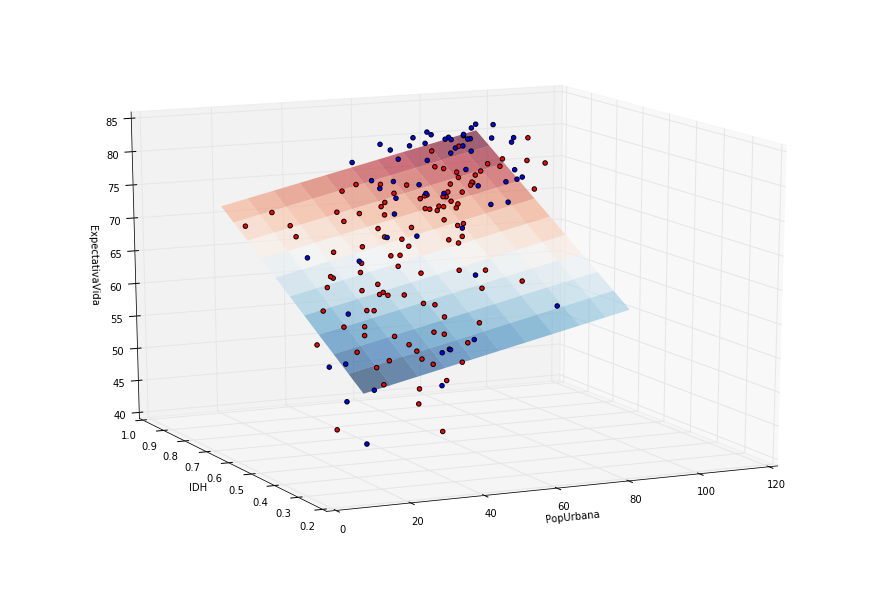

In [30]:
from mpl_toolkits.mplot3d import Axes3D

X = Dados[['PopUrbana', 'IDH']]
y = Dados['ExpectativaVida']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.PopUrbana.min(), X.PopUrbana.max(), 100), 
                       np.linspace(X.IDH.min(), X.IDH.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

ax.scatter(grupo.PopUrbana, grupo.IDH, grupo.ExpectativaVida, color='black', alpha=1.0, facecolor='white',c='red')
ax.scatter(grupo2.PopUrbana, grupo2.IDH, grupo2.ExpectativaVida, color='black', alpha=1.0)
#ax.mouse_init()

ax.set_xlabel('PopUrbana')
ax.set_ylabel('IDH')
ax.set_zlabel('ExpectativaVida')

Conclusão:

Portanto, a partir dos testes de hipótese feitos, concluímos que a hipótese nula de que a associação verdadeira entre as variáveis de resposta e explicativas fosse zero foi rejeitada com uma confiança de 95% para o caso dos dados globais, mas não se pode dizer o mesmo para o grupo de países que investem menos do que 7% do PIB em Saúde. Nesse sentido, para os dados globais nosso modelo é satisfatório, no entanto, esta afirmação não é válida para os dados locais.

Quanto às variáveis, percebe-se que o IDH está fortemente associado à expectativa de vida, principalmente ao separar os países entre investimento na saúde. Entretanto, a população urbana, considerando os dados globais, está associada à expectativa de vida, porém, ao analisar os dados locais, o mesmo já não pode ser dito.